# Taller: generar y graficar 3 distribuciones de probabilidad discretas y 3 continuas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

N = 10000

def wichmannHill():
    rand = []
    s1 = 14327
    s2 = 23564
    s3 = 27983
    for i in range(N):
        s1 = 171*s1 % 30269
        s2 = 172*s2 % 30307
        s3 = 170*s3 % 30323
        u = (s1/float(30269)+s2/float(30307)+s3/float(30323)) % 1
        rand.append(u)
    return rand

def genValAleat(Px):
    PxAcum = Px
    PxAcum[0] = Px[0]
    for i in range(len(Px)-1):
        PxAcum[i+1] = PxAcum[i] + Px[i+1]   
    PxAcum = [0] + PxAcum
    Valeat = []
    genAleat = wichmannHill()
    #genAleat = rnd.CongMixto(N)
    for i in range(len(genAleat)):
        for j in range(len(PxAcum)-1):
            if(genAleat[i] > PxAcum[j] and genAleat[i] <= PxAcum[j+1]):
                Valeat += [j]
                break
    #print "Dados ",Valeat 
    return Valeat

def c(k):
    ck = 1.0
    if(k >= 1):
        ck = 0.0
        for m in range(k):
            ck += (c(m)*c(k-1-m))/float((m+1)*((2*m)+1))
    return ck

def erfInv(z):
    erf = 0
    infinito = 5
    for k in range(infinito):
        erf += (c(k)/float((2*k)+1))*((math.sqrt(math.pi)*z/float(2))**((2*k)+1))
    return erf
   

# Distribuciones de Probabilidad Discretas

## Poisson

[3.059023205018258e-07, 4.588534807527386e-06, 3.44140110564554e-05, 0.000172070055282277, 0.0006452627073085387, 0.0019357881219256162, 0.0048394703048140406, 0.010370293510315801, 0.019444300331842128, 0.03240716721973688, 0.048610750829605316, 0.06628738749491635, 0.08285923436864542, 0.09560680888689858, 0.10243586666453419, 0.10243586666453419, 0.0960336249980008, 0.08473555146882424, 0.07061295955735353, 0.05574707333475278]
[15, 10, 15, 18, 12, 10, 16, 18, 11, 19, 8, 14, 19, 18, 11, 14, 12, 19, 14, 14, 13, 12, 19, 16, 16, 16, 19, 11, 14, 15, 7, 13, 9, 10, 14, 17, 13, 16, 13, 18, 11, 17, 14, 14, 16, 18, 11, 19, 13, 15, 16, 11, 15, 10, 16, 9, 11, 19, 13, 19, 18, 19, 15, 16, 14, 12, 19, 11, 17, 14, 14, 14, 13, 18, 8, 13, 17, 11, 17, 17, 10, 15, 13, 14, 15, 8, 18, 9, 11, 17, 15, 12, 19, 19, 16, 7, 13, 11, 16, 7, 10, 15, 11, 12, 6, 10, 15, 19, 18, 8, 14, 15, 19, 15, 16, 14, 19, 16, 14, 14, 16, 19, 17, 17, 15, 14, 18, 16, 19, 11, 10, 12, 16, 10, 14, 15, 11, 15, 15, 13, 9, 16, 15, 12, 

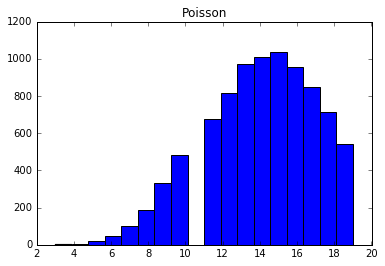

In [2]:
def poisson(ly,k):
    Px = [1.0] * k
    for kx in range(k):
        Px[kx] = (math.exp(-ly) * (ly ** kx))/float(math.factorial(kx))
    return Px

Px = poisson(15,20)
print Px
Valeat = genValAleat(Px)
print Valeat
plt.hist(Valeat,np.max(Valeat)-1)
plt.title("Poisson")
plt.show()


## Bernoulli

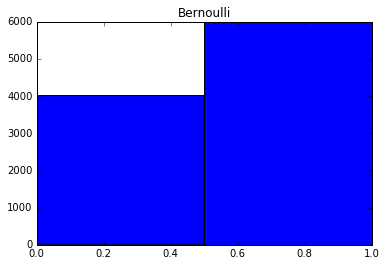

In [4]:
def bernoulli(p):
    Px = [1.0,1.0]
    q = 1 - p
    for i in range(len(Px)):
        Px[i] = (p ** i)*(q ** (1-i))
    return Px

Px = bernoulli(0.6)
Valeat = genValAleat(Px)
plt.hist(Valeat,len(Px))
plt.title("Bernoulli")
plt.show()

## Binomial

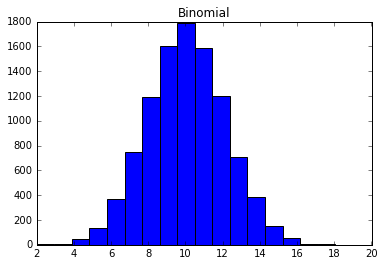

In [5]:
def binomial(p,n):
    Px = [1.0] * n
    q = 1 - p
    for x in range(len(Px)):
        comb = math.factorial(n)/float(math.factorial(x)*math.factorial(n-x))
        Px[x] = comb*(p ** x)*(q ** (n-x))
    return Px

Px = binomial(0.5,20)
Valeat = genValAleat(Px)
plt.hist(Valeat,np.max(Valeat)-1)
plt.title("Binomial")
plt.show()


# Distribuciones de Probabilidad Continuas

## Exponencial

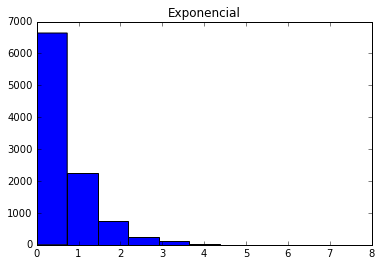

In [7]:
def exponencial(ly):
    Px = [1.0] * N
    p = wichmannHill()
    for i in range(len(Px)):
        Px[i] = -math.log((1-p[i]),math.e)/ly
    return Px

Px = exponencial(1.5)
plt.hist(Px)
plt.title("Exponencial")
plt.show()

## Normal

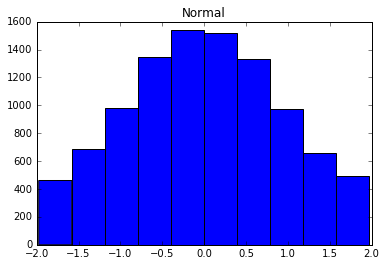

In [8]:
def normal(miu,var):
    teta = math.sqrt(var) 
    Px = [1.0] * N
    p = wichmannHill()
    for i in range(len(Px)):
        Px[i] = miu + (teta*math.sqrt(2)*erfInv((2*p[i])-1))
    return Px
        
Px = normal(0,1)
plt.hist(Px)
plt.title("Normal")
plt.show()
